Risiko kredit adalah kerugian yang berhubungan dengan potensi kegagalan dalam memenuhi kewajiban membayar kredit ketika waktu jatuh tempo. Dengan kata lain, risiko kredit adalah kemungkinan debitur tidak mampu membayar pinjamannya. Ada 2 hal yang mempengaruhi tingkat risiko kredit, yaitu besarnya eksposur kredit serta kualitas eksposur kredit itu sendiri. Semakin tinggi utang maka semakin tinggi pula eksposur kreditnya. Sementara itu kualitas eksposur dalam risiko kredit adalah kemungkinan gagal bayar serta diukur dari kualitas cicilan yang dilakukan debitur. Jika nilai jaminan kredit debitur semakin rendah, maka kualitas eksposur kreditnya pun semakin rendah. Artinya, risiko kredit yang ditanggung akan semakin tinggi. 

Sumber: https://www.ocbc.id/id/article/2022/02/24/risiko-kredit-adalah

# 1. **Tujuan**

- Membangun model yang dapat memprediksi credit risk.

# 2. Membaca Dataset

In [133]:
import requests 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #untuk pemisahan data latih dan uji
from sklearn.ensemble import RandomForestClassifier #untuk menggunakan algoritma Random Forest
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

Mendownload file dataset

In [134]:
url = 'https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv'

In [135]:
response = requests.get(url)
if response.status_code == 200:
    with open('data_loan.csv', 'wb') as file:
        file.write(response.content)
        print("Download berhasil. File 'data_loan.csv' tersimpan")
else:
    print("Download file gagal")

Download berhasil. File 'data_loan.csv' tersimpan


Mendapatkan lokasi dataset

In [136]:
print(os.getcwd())

C:\Users\Sidik\Idx Partners


In [260]:
df = pd.read_csv('C:/Users/Sidik/Idx Partners/data_loan.csv')

C:\Users\Sidik\AppData\Local\Temp\ipykernel_5416\767589813.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Sidik/Idx Partners/data_loan.csv')


# 3. Eksplorasi DataSet

Menampilkan beberapa data

In [261]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mengidentifikasi kolom yang ada pada dataset

In [262]:
df.shape

(466285, 75)

In [263]:
df.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

Mendapatkan informasi detail tentang dataset

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Menampilkan deskriptif statistik dataset

In [265]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [266]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [267]:
df.nunique()

Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124435
purpose                            14
title                           63098
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs 

In [268]:
df.dtypes

Unnamed: 0                       int64
id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                      

# 3. Preprocessing Data

In [269]:
ds = pd.DataFrame(df.copy())

In [270]:
missing_values = ds.isnull().sum()
missing_values_table = pd.DataFrame({'Nama Kolom': missing_values.index, 'Jumlah NaN': missing_values.values})
pd.set_option('display.max_rows', 75)
print(missing_values_table)

                     Nama Kolom  Jumlah NaN
0                    Unnamed: 0           0
1                            id           0
2                     member_id           0
3                     loan_amnt           0
4                   funded_amnt           0
5               funded_amnt_inv           0
6                          term           0
7                      int_rate           0
8                   installment           0
9                         grade           0
10                    sub_grade           0
11                    emp_title       27588
12                   emp_length       21008
13               home_ownership           0
14                   annual_inc           4
15          verification_status           0
16                      issue_d           0
17                  loan_status           0
18                   pymnt_plan           0
19                          url           0
20                         desc      340304
21                      purpose 

In [271]:
kolom_drop = ['Unnamed: 0', 'id', 'member_id',  'url', 'desc', 'policy_code', 'desc', 
              'next_pymnt_d', 'annual_inc_joint', 'emp_length',
              'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'all_util',
              'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'title',
              'mths_since_rcnt_il', 'max_bal_bc', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'int_rate', 
              'funded_amnt', 'funded_amnt_inv', 'loan_amnt', 'emp_title', 'last_credit_pull_d']


In [272]:
ds = ds.drop(kolom_drop, axis=1)

In [273]:
ds.shape

(466285, 42)

In [274]:
ds.duplicated().sum()

0

In [275]:
ds.dropna(subset=['revol_util', 'last_pymnt_d', 'collections_12_mths_ex_med', 'tot_cur_bal', 'tot_coll_amt'], inplace = True)

In [276]:
ds = pd.DataFrame(ds)

In [277]:
missing_values = ds.isnull().sum()
missing_values_table = pd.DataFrame({'Nama Kolom': missing_values.index, 'Jumlah NaN': missing_values.values})
pd.set_option('display.max_rows', 75)
print(missing_values_table)

                     Nama Kolom  Jumlah NaN
0                          term           0
1                   installment           0
2                         grade           0
3                     sub_grade           0
4                home_ownership           0
5                    annual_inc           0
6           verification_status           0
7                       issue_d           0
8                   loan_status           0
9                    pymnt_plan           0
10                      purpose           0
11                     zip_code           0
12                   addr_state           0
13                          dti           0
14                  delinq_2yrs           0
15             earliest_cr_line           0
16               inq_last_6mths           0
17       mths_since_last_delinq      204895
18       mths_since_last_record      337427
19                     open_acc           0
20                      pub_rec           0
21                    revol_bal 

In [278]:
ds.shape

(395530, 42)

In [279]:
ds.head()

,term,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
42535,36 months,885.46,B,B2,OWN,55000.0,Verified,Dec-13,Current,n,...,0.0,0.0,Jan-16,885.46,0.0,NaN,INDIVIDUAL,0.0,0.0,114834.0
42536,36 months,333.14,C,C1,RENT,26000.0,Not Verified,Dec-13,Current,n,...,0.0,0.0,Jan-16,333.14,0.0,NaN,INDIVIDUAL,0.0,0.0,14123.0
42537,36 months,368.45,A,A2,MORTGAGE,105000.0,Not Verified,Dec-13,Current,n,...,0.0,0.0,Jan-16,368.45,0.0,NaN,INDIVIDUAL,0.0,0.0,267646.0
42538,36 months,407.40,B,B5,RENT,40000.0,Source Verified,Dec-13,Fully Paid,n,...,0.0,0.0,Sep-15,119.17,0.0,53.0,INDIVIDUAL,0.0,15386.0,13605.0
42539,36 months,476.30,A,A5,MORTGAGE,63000.0,Not Verified,Dec-13,Current,n,...,0.0,0.0,Jan-16,476.30,0.0,34.0,INDIVIDUAL,0.0,1514.0,272492.0


In [280]:
ds.dtypes

term                            object
installment                    float64
grade                           object
sub_grade                       object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util                     float64
total_acc                      float64
initial_list_status             object
out_prncp                

In [281]:
ds['home_ownership'].value_counts()

home_ownership
MORTGAGE    204442
RENT        154784
OWN          36216
OTHER           45
NONE            42
ANY              1
Name: count, dtype: int64

In [282]:
ds['home_ownership'] = ds['home_ownership'].map({'NONE': 0, 'OWN': 1, 'RENT' : 2, 'MORTGAGE' : 3, 'OTHER' : 4, 'ANY' : 4})

In [283]:
ds['application_type'].value_counts()

application_type
INDIVIDUAL    395530
Name: count, dtype: int64

In [284]:
kolom_drop2 = ['application_type']
ds = ds.drop(kolom_drop2, axis=1)

In [285]:
ds['grade'].value_counts()

grade
B    115062
C    110633
D     67170
A     58092
E     30664
F     11256
G      2653
Name: count, dtype: int64

In [286]:
ds['grade'] = ds['grade'].map({'A': 0, 'B': 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6})

'A': 0, 'B': 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6

In [287]:
ds['sub_grade'].value_counts()

sub_grade
B4    26027
B3    25899
B2    22905
C2    22876
C3    22870
C1    22805
C4    21929
B5    20633
C5    20153
B1    19598
A5    17500
D1    17402
D2    14676
A4    14220
D3    12816
D4    12285
D5     9991
A3     9652
A1     8362
A2     8358
E1     7740
E2     7485
E3     5998
E4     5120
E5     4321
F1     3344
F2     2526
F3     2348
F4     1764
F5     1274
G1      902
G2      671
G3      488
G4      307
G5      285
Name: count, dtype: int64

In [288]:
ds = ds.drop('sub_grade', axis=1)

In [289]:
ds['verification_status'].value_counts()

verification_status
Verified           144322
Source Verified    131985
Not Verified       119223
Name: count, dtype: int64

In [290]:
ds['verification_status'] = ds['verification_status'].replace('Source Verified', 'Verified')

In [291]:
ds['verification_status'].value_counts()

verification_status
Verified        276307
Not Verified    119223
Name: count, dtype: int64

In [292]:
ds['verification_status'] = ds['verification_status'].replace('Verified', '1')
ds['verification_status'] = ds['verification_status'].replace('Not Verified', '0')

In [293]:
ds['verification_status'].value_counts()

verification_status
1    276307
0    119223
Name: count, dtype: int64

1 adalah Verified, dan 2 adalah not verified

In [294]:
ds['term'].value_counts()

term
 36 months    283522
 60 months    112008
Name: count, dtype: int64

In [295]:
ds['term'] = ds['term'].str.replace(' months', '').astype(int)

In [296]:
ds['term'].value_counts()

term
36    283522
60    112008
Name: count, dtype: int64

In [297]:
ds['issue_d'].value_counts()

issue_d
Oct-14    38733
Jul-14    29274
Nov-14    25028
May-14    19080
Apr-14    19048
Aug-14    18791
Jun-14    17164
Mar-14    16493
Jan-14    15615
Feb-14    15253
Dec-13    15003
Nov-13    14666
Oct-13    14093
Sep-13    12962
Aug-13    12653
Jul-13    11895
Jun-13    10891
Sep-14    10589
May-13    10338
Dec-14    10294
Apr-13     9405
Mar-13     8262
Feb-13     7554
Jan-13     6865
Nov-12     6371
Oct-12     6250
Dec-12     6054
Sep-12     5999
Aug-12      907
Name: count, dtype: int64

In [298]:
ds = ds.drop('issue_d', axis=1)

In [299]:
ds['loan_status'].value_counts()

loan_status
Current               220534
Fully Paid            130966
Charged Off            32173
Late (31-120 days)      6775
In Grace Period         3078
Late (16-30 days)       1190
Default                  814
Name: count, dtype: int64

In [300]:
ds['loan_status'] = ds['loan_status'].map({'Current': 0, 'Fully Paid': 0, 'Charged Off' : 1, 'Late (31-120 days)' : 1, 
                                           'In Grace Period' : 1, 'Late (16-30 days)' : 1, 'Default' : 1})


Current = 0
Fully Paid = 1
Charged Off = 2
Late (31-120 days) = 3
In Grace Period = 4
Late (16-30 days) = 5
Default = 6

In [301]:
ds['pymnt_plan'].value_counts()

pymnt_plan
n    395525
y         5
Name: count, dtype: int64

In [302]:
ds['pymnt_plan'] = ds['pymnt_plan'].map({'n': 0, 'y': 1})

n = 0, y = 1

In [303]:
categorical = [cols for cols in df.columns if df[cols].dtypes=='object']
numerical = [cols for cols in df.columns if df[cols].dtypes=='float64']

In [304]:
ds['purpose'].value_counts()

purpose
debt_consolidation    238930
credit_card            93450
home_improvement       21615
other                  17447
major_purchase          6674
small_business          4074
medical                 3503
car                     3190
moving                  2125
vacation                1884
house                   1562
wedding                  868
renewable_energy         208
Name: count, dtype: int64

In [305]:
ds = ds.drop('purpose', axis=1)

In [306]:
ds = ds.drop('zip_code', axis=1)

In [307]:
ds = ds.drop('earliest_cr_line', axis=1)

In [308]:
ds = ds.drop('addr_state', axis=1)

In [309]:
ds['initial_list_status'].value_counts()

initial_list_status
f    232434
w    163096
Name: count, dtype: int64

In [310]:
ds['initial_list_status'] = ds['initial_list_status'].map({'f': 0, 'w': 1})

whole loan = 1, fractional loan = 0

In [311]:
ds = ds.drop('last_pymnt_d', axis=1)

In [312]:
ds = ds.drop('verification_status', axis=1)

In [313]:
ds = ds.drop('term', axis=1)

In [314]:
ds = ds.drop('pymnt_plan', axis=1)

In [315]:
ds = ds.drop('initial_list_status', axis=1)

In [316]:
ds = ds.drop('total_pymnt', axis=1)

In [317]:
ds = ds.drop('out_prncp', axis=1)

In [318]:
ds = ds.drop('total_rec_int', axis=1)

In [319]:
ds = ds.drop('collection_recovery_fee', axis=1)

In [320]:
ds = ds.drop('total_rec_prncp', axis=1)

In [321]:
ds = ds.drop('out_prncp_inv', axis=1)

In [322]:
ds.dtypes

installment                    float64
grade                            int64
home_ownership                   int64
annual_inc                     float64
loan_status                      int64
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util                     float64
total_acc                      float64
total_pymnt_inv                float64
total_rec_late_fee             float64
recoveries                     float64
last_pymnt_amnt                float64
collections_12_mths_ex_med     float64
mths_since_last_major_derog    float64
acc_now_delinq                 float64
tot_coll_amt                   float64
tot_cur_bal                    float64
dtype: object

In [323]:
ds.isnull().sum()

installment                         0
grade                               0
home_ownership                      0
annual_inc                          0
loan_status                         0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq         204895
mths_since_last_record         337427
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc                           0
total_pymnt_inv                     0
total_rec_late_fee                  0
recoveries                          0
last_pymnt_amnt                     0
collections_12_mths_ex_med          0
mths_since_last_major_derog    296694
acc_now_delinq                      0
tot_coll_amt                        0
tot_cur_bal                         0
dtype: int64

In [324]:
ds = ds.drop('mths_since_last_delinq', axis=1)

In [325]:
ds = ds.drop('tot_coll_amt', axis=1)

In [326]:
ds = ds.drop('acc_now_delinq', axis=1)

In [327]:
ds = ds.drop('collections_12_mths_ex_med', axis=1)

In [328]:
ds = ds.drop('total_acc', axis=1)

In [329]:
ds = ds.drop('mths_since_last_record', axis=1)
ds = ds.drop('mths_since_last_major_derog', axis=1)

In [330]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ds)
scaled_features = scaler.transform(ds)

data_scaled = pd.DataFrame(scaled_features,columns = ds.columns)
display(data_scaled)

,installment,grade,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt_inv,total_rec_late_fee,recoveries,last_pymnt_amnt,tot_cur_bal
0,1.806000,-0.653788,-2.177620,-0.348813,-0.353925,0.652410,-0.369327,-0.747974,0.508166,-0.332149,0.958627,0.187837,1.235213,-0.111664,-0.153314,-0.401927,-0.157543
1,-0.460171,0.113181,-0.649828,-0.879812,-0.353925,0.938073,-0.369327,-0.747974,0.110146,-0.332149,-0.411089,-0.178118,-0.413412,-0.111664,-0.153314,-0.499137,-0.819831
2,-0.315294,-1.420756,0.877964,0.566704,-0.353925,-0.467389,-0.369327,0.217156,0.110146,-0.332149,-0.162618,-1.537378,-0.307953,-0.111664,-0.153314,-0.492923,0.847367
3,-0.155482,-0.653788,-0.649828,-0.623468,-0.353925,-0.100471,-0.369327,-0.747974,-0.884905,3.343954,-0.525506,0.518939,0.253805,-0.111664,-0.153314,-0.536797,-0.823238
4,0.127215,-1.420756,0.877964,-0.202330,-0.353925,-0.155064,-0.369327,-0.747974,-0.685895,-0.332149,-0.245601,0.754195,0.013956,-0.111664,-0.153314,-0.473941,0.879235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395525,-0.051922,0.113181,0.877964,0.658255,-0.353925,0.268987,-0.369327,1.182286,1.304207,-0.332149,0.317028,0.902320,-0.116360,-0.111664,-0.153314,-0.481625,1.027237
395526,0.562954,0.880149,0.877964,0.072325,2.825455,0.091241,-0.369327,4.077677,1.304207,1.505903,0.079593,-0.461297,-0.825924,-0.111664,-0.153314,-0.554691,0.546075
395527,0.283293,0.880149,0.877964,-0.513606,-0.353925,1.005362,-0.369327,1.182286,1.304207,-0.332149,-0.472191,-0.252180,0.127475,-0.111664,-0.153314,-0.467245,-0.428716
395528,-1.570239,-1.420756,-2.177620,0.163876,-0.353925,-1.566874,3.227901,0.217156,1.901238,-0.332149,-0.246891,-1.541735,-1.143224,-0.111664,-0.153314,-0.293647,2.977794


# 3. Visualisasi Data

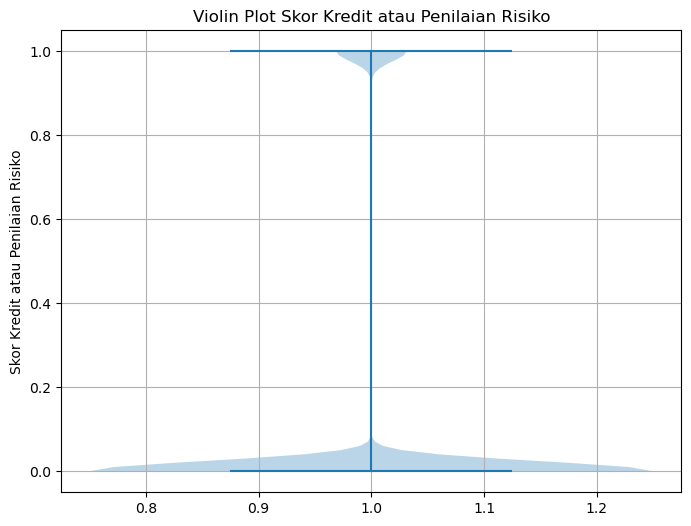

In [331]:
plt.figure(figsize=(8, 6))
plt.violinplot(ds['loan_status'])
plt.ylabel('Skor Kredit atau Penilaian Risiko')
plt.title('Violin Plot Skor Kredit atau Penilaian Risiko')
plt.grid(True)
plt.show()

<Axes: >

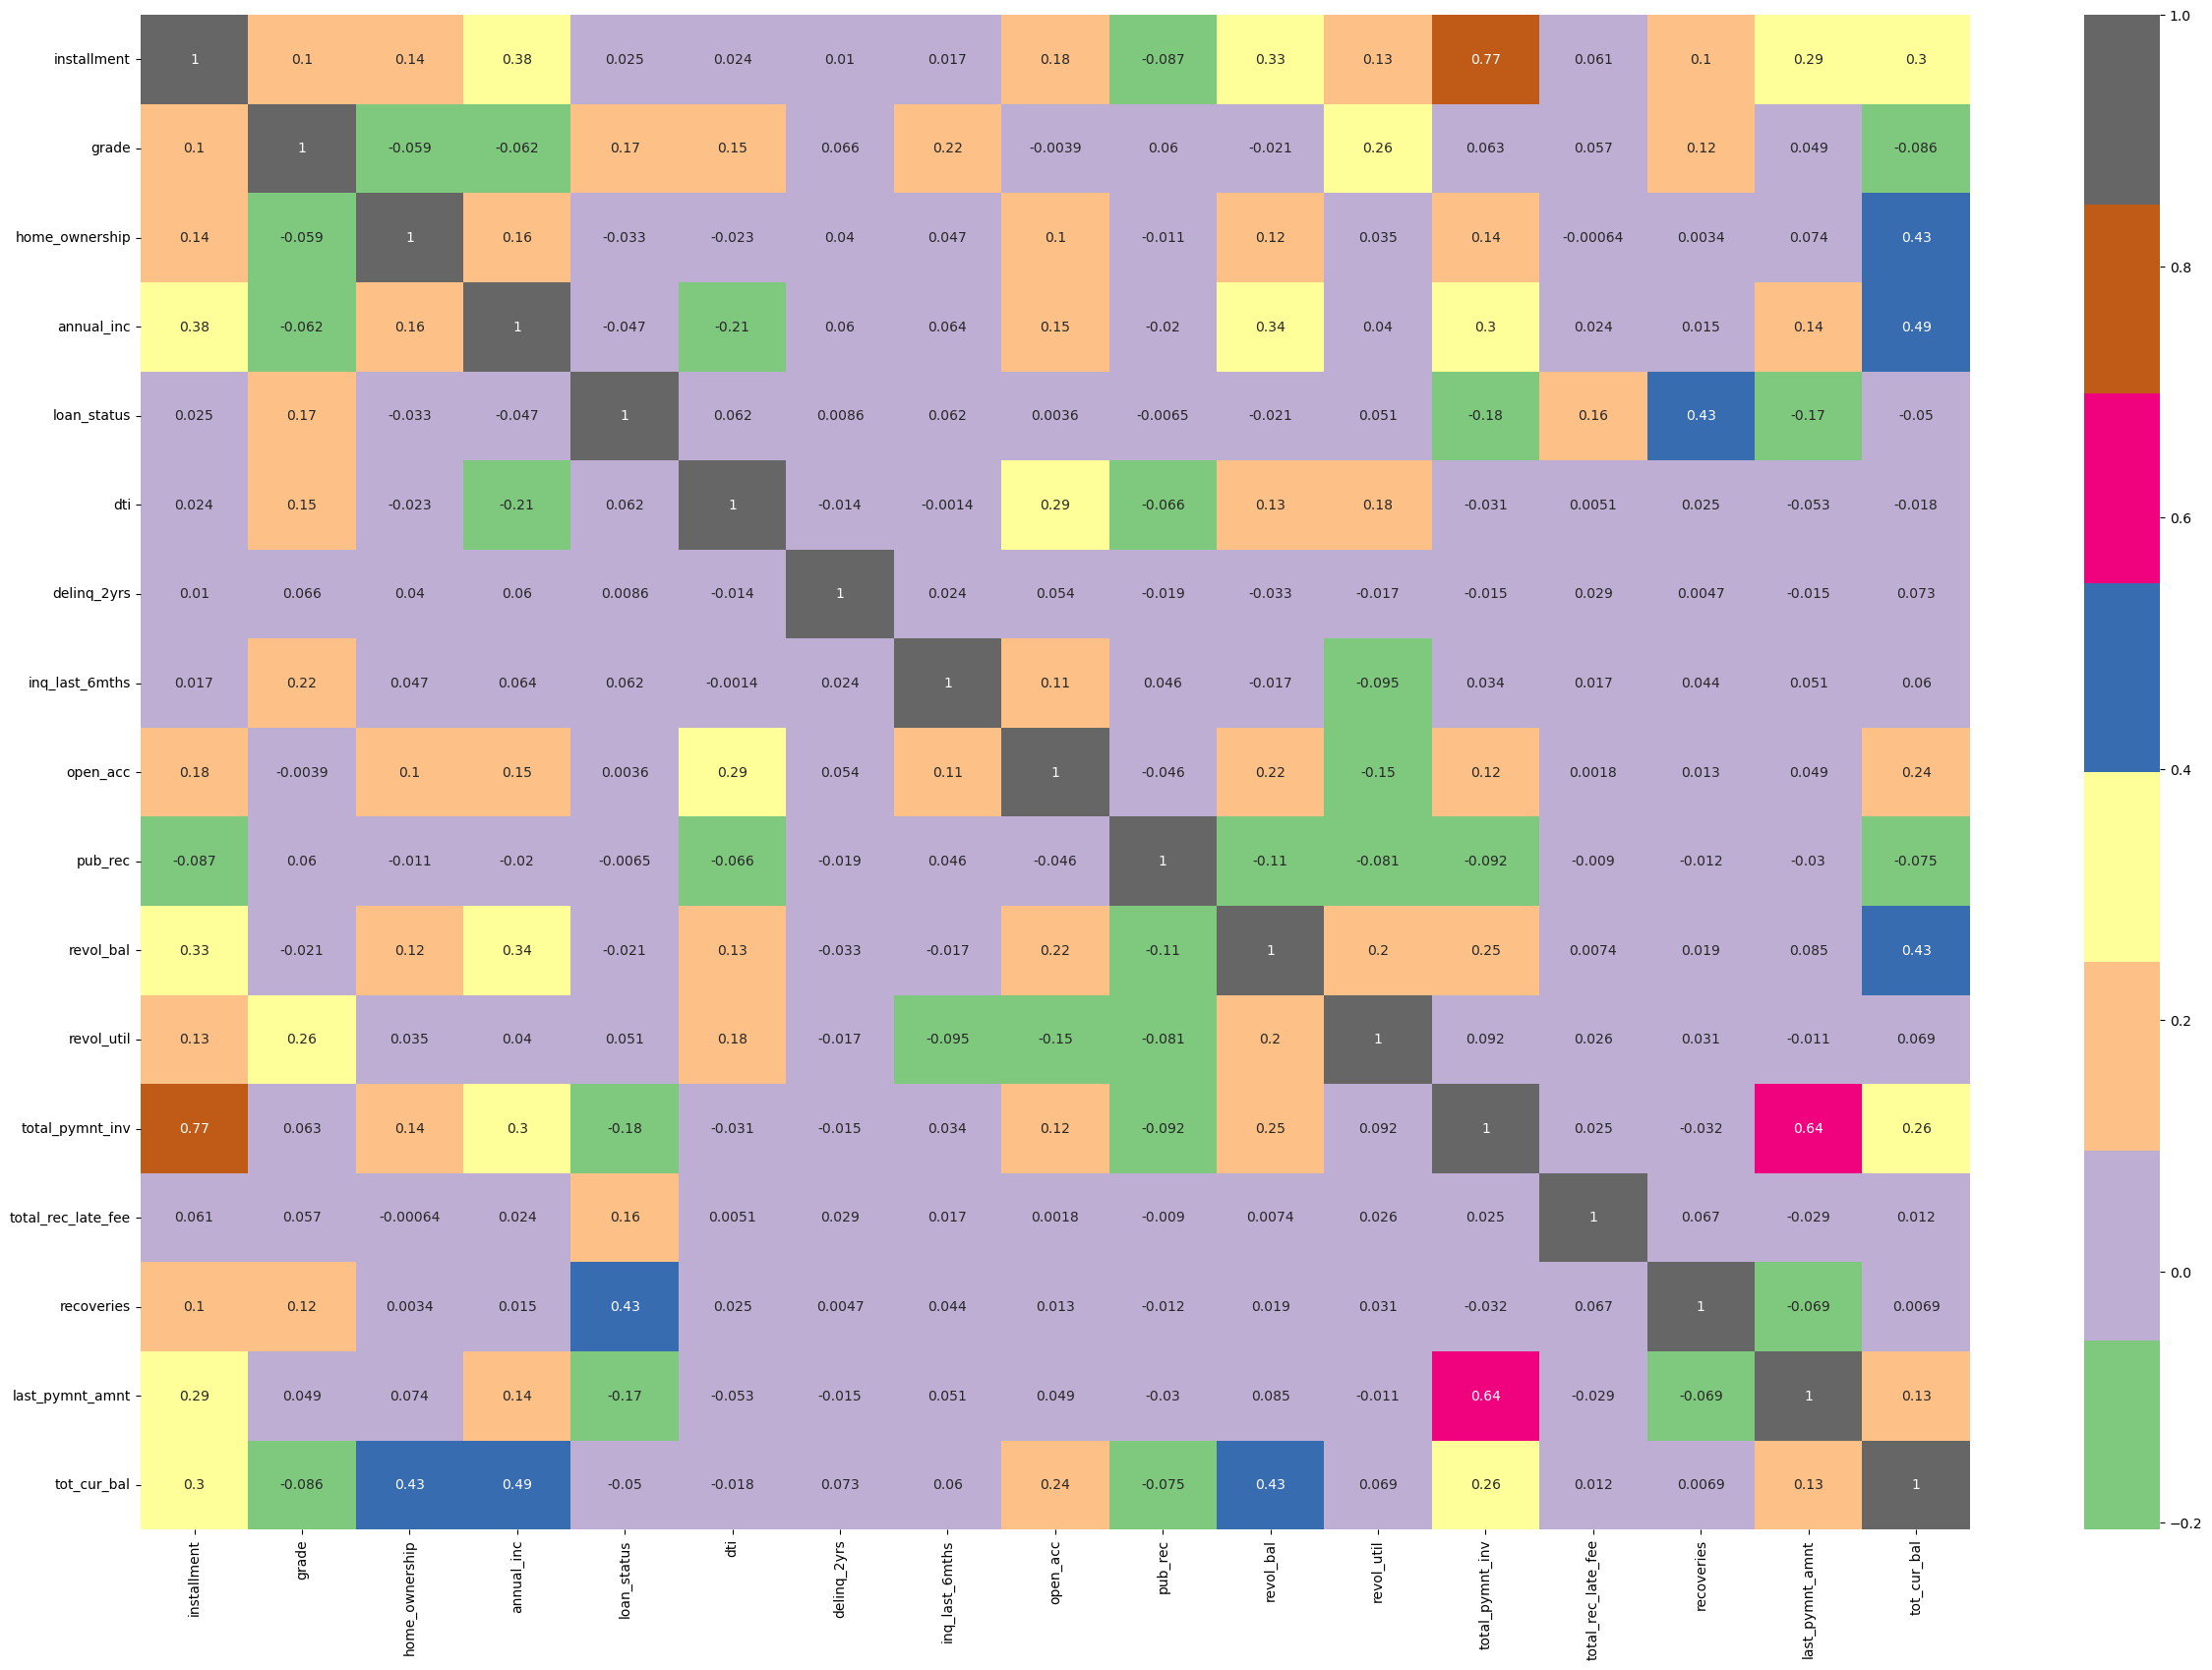

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(ds.corr(), annot=True, cmap='Accent')

In [333]:
ds['grade'] = ds['grade'].map({0: 'A', 1: 'B', 2 : 'C', 3 : 'D', 4 : 'E', 5 : 'F', 6 : 'G'})

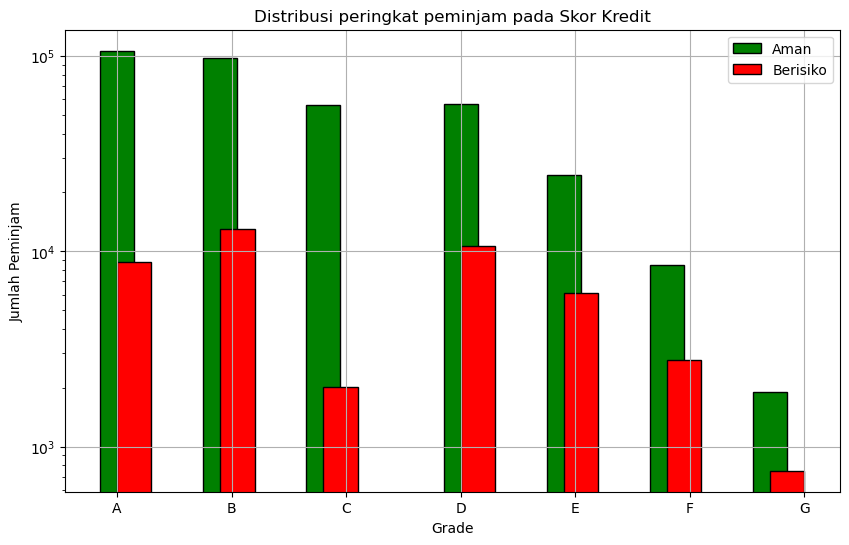

In [334]:
# Menyeleksi data dengan skor kredit tertentu
grades_unique = sorted(ds['grade'].unique())

pendapatan_skor_0 = ds['grade'][ds['loan_status'].round() == 0]
pendapatan_skor_1 = ds['grade'][ds['loan_status'].round() == 1]

# Menentukan nilai unik dari 'grade' dan mengurutkannya secara alfabetis

# Menentukan posisi masing-masing grade pada sumbu x
positions = np.arange(len(grades_unique))

# Menyusun histogram dengan posisi bins yang sudah ditentukan
plt.figure(figsize=(10, 6))
plt.hist(pendapatan_skor_0, bins=20, edgecolor='black', color='g', align='left', label='Aman')
plt.hist(pendapatan_skor_1, bins=20, edgecolor='black', color='r', align='mid', label='Berisiko')

plt.xticks(positions, grades_unique)  # Memberikan label pada sumbu x sesuai dengan peringkat peminjam
plt.yscale('log')
plt.xlabel('Grade')
plt.ylabel('Jumlah Peminjam')
plt.title('Distribusi peringkat peminjam pada Skor Kredit')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [335]:
ds['grade'] = ds['grade'].map({'A': 0, 'B': 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6})

# 4. Pembuatan Model 

Pembuatan model ML pada kesempatan ini menggunakan Random Forest Classifier

In [337]:
y = ds['loan_status']
X = ds.drop(columns=['loan_status'])

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

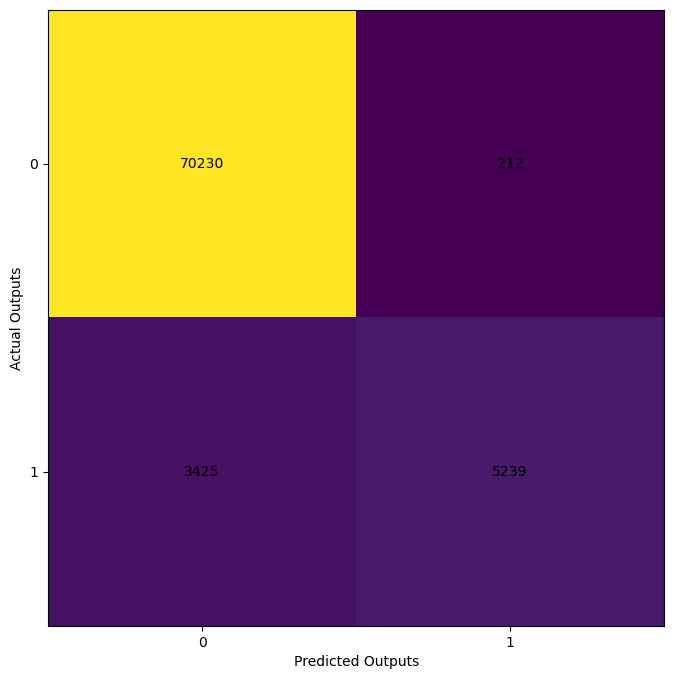

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     70442
           1       0.96      0.60      0.74      8664

    accuracy                           0.95     79106
   macro avg       0.96      0.80      0.86     79106
weighted avg       0.95      0.95      0.95     79106

Accuracy Score: 0.9540237150152959


In [338]:
cm = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='black')
ax.set_ylabel('Actual Outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='black')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')

In [348]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

data_scaled = pd.DataFrame(scaled_features,columns = X.columns)
display(data_scaled)

,installment,grade,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt_inv,total_rec_late_fee,recoveries,last_pymnt_amnt,tot_cur_bal
0,1.806000,-0.653788,-2.177620,-0.348813,0.652410,-0.369327,-0.747974,0.508166,-0.332149,0.958627,0.187837,1.235213,-0.111664,-0.153314,-0.401927,-0.157543
1,-0.460171,0.113181,-0.649828,-0.879812,0.938073,-0.369327,-0.747974,0.110146,-0.332149,-0.411089,-0.178118,-0.413412,-0.111664,-0.153314,-0.499137,-0.819831
2,-0.315294,-1.420756,0.877964,0.566704,-0.467389,-0.369327,0.217156,0.110146,-0.332149,-0.162618,-1.537378,-0.307953,-0.111664,-0.153314,-0.492923,0.847367
3,-0.155482,-0.653788,-0.649828,-0.623468,-0.100471,-0.369327,-0.747974,-0.884905,3.343954,-0.525506,0.518939,0.253805,-0.111664,-0.153314,-0.536797,-0.823238
4,0.127215,-1.420756,0.877964,-0.202330,-0.155064,-0.369327,-0.747974,-0.685895,-0.332149,-0.245601,0.754195,0.013956,-0.111664,-0.153314,-0.473941,0.879235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395525,-0.051922,0.113181,0.877964,0.658255,0.268987,-0.369327,1.182286,1.304207,-0.332149,0.317028,0.902320,-0.116360,-0.111664,-0.153314,-0.481625,1.027237
395526,0.562954,0.880149,0.877964,0.072325,0.091241,-0.369327,4.077677,1.304207,1.505903,0.079593,-0.461297,-0.825924,-0.111664,-0.153314,-0.554691,0.546075
395527,0.283293,0.880149,0.877964,-0.513606,1.005362,-0.369327,1.182286,1.304207,-0.332149,-0.472191,-0.252180,0.127475,-0.111664,-0.153314,-0.467245,-0.428716
395528,-1.570239,-1.420756,-2.177620,0.163876,-1.566874,3.227901,0.217156,1.901238,-0.332149,-0.246891,-1.541735,-1.143224,-0.111664,-0.153314,-0.293647,2.977794


In [345]:
ds.columns.values

array(['installment', 'grade', 'home_ownership', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_pymnt_inv',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'tot_cur_bal'], dtype=object)

-   Skenario 1

Misal terdapat data pengguna kartu kredit sebagai berikut:
1. installment : 885
2. grade : B (1)
3. home_ownership : Rent (2)
4. annual_inc : 105000
5. dti : 21
6. delinq_2yrs : 0
7. inq_last_6mths : 4
8. open_acc : 12
9. pub_rec : 0
10. revol_bal 52 
11. revol_util : 61
12. total_pymnt_inv :21444
13. total_rec_late_fee : 0
14. recoveries : 0
15. last_pymnt_amnt : 4027
16. tot_cur_bal : 35020

Pengguna ini akan termasuk dalam kelompok kredit risk apa?


In [351]:
installment = float(input('Installment:'))
grade = float(input('Grade ("A: 0, B: 1, C: 2, D: 3, E: 4, F: 5, G: 6"):'))
home_ownership = float(input('Home ownership ("NONE: 0, OWN: 1, RENT : 2, MORTGAGE : 3, OTHER : 4 "):'))
annual_inc = float(input('Annual income:'))
dti = float(input('Debt-to-Income Ratio:'))
delinq_2yrs = float(input('Total Late Payments in the Last 2 Years:'))
inq_last_6mths  = float(input('Inquiries in Last 6 Months:'))
open_acc = float(input('Number of Open Credit Lines:'))
pub_rec = float(input('Number of Public Record Bankruptcies:'))
revol_bal  = float(input('Revolving Balance:'))
revol_util = float(input('Revolving Line Utilization:'))
total_pymnt_inv = float(input('Total Payment Invoice:'))
total_rec_late_fee = float(input('Total Received Late Fee:'))
recoveries = float(input('Recoveries:'))
last_pymnt_amnt = float(input('Last Payment Amount:'))
tot_cur_bal = float(input('"Total Current Balance:'))


val = [installment, grade, home_ownership, annual_inc,
       dti, delinq_2yrs, inq_last_6mths, open_acc,
       pub_rec, revol_bal, revol_util, total_pymnt_inv, 
       total_rec_late_fee, recoveries, last_pymnt_amnt, tot_cur_bal]

val = scaler.transform([val])

print('Input values:', val)

val_predict = model_rf.predict(val)

if val_predict == 0:
    print('Risiko Kredit Peminjam Berada pada Kategori Aman'.format(val_predict))
else:
    print('Risiko Kredit Peminjam Berada pada Kategori BAHAYA'.format(val_predict))

Installment:885
Grade ("A: 0, B: 1, C: 2, D: 3, E: 4, F: 5, G: 6"):1
Home ownership ("NONE: 0, OWN: 1, RENT : 2, MORTGAGE : 3, OTHER : 4 "):2
Annual income:105000
Debt-to-Income Ratio:21
Total Late Payments in the Last 2 Years:0
Inquiries in Last 6 Months:4
Number of Open Credit Lines:12
Number of Public Record Bankruptcies:0
Revolving Balance:52
Revolving Line Utilization:61
Total Payment Invoice:21444
Total Received Late Fee:0
Recoveries:0
Last Payment Amount:4027
"Total Current Balance:35020
Input values: [[ 1.80411286 -0.65378774 -0.64982824  0.56670354  0.41499227 -0.36932679
   3.11254693  0.11014569 -0.33214859 -0.78921604  0.17912373  1.25921021
  -0.11166434 -0.15331419  0.15099236 -0.68241   ]]
Risiko Kredit Peminjam Berada pada Kategori BAHAYA


C:\Users\Sidik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sidik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
